### Radio and X-ray luminosity phase space plot for various kinds of sources

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({
    'savefig.dpi': 300, 
    "figure.dpi": 300,
    "font.family": "Arial",
    "font.size": 6,
    "pdf.fonttype": 42,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "lines.linewidth": 0.8,
    "errorbar.capsize": 2.0,
    "text.usetex": False
})

cm = 1/2.54  # centimeters in inches

from plot_sources import (
    plot_pulsars, plot_magnetars, plot_xrbs, 
    plot_stars, plot_cvs, plot_gcrts,
    add_text, forward, inverse, plot_ratio
)
from astropy import units as u, constants as c

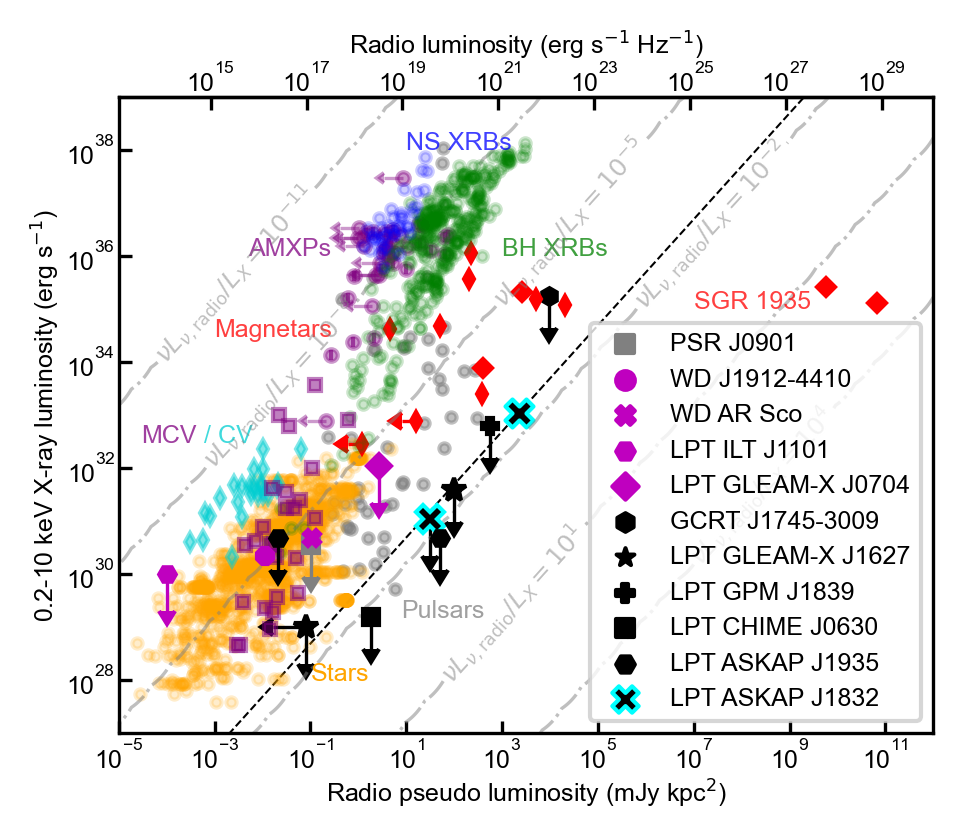

In [3]:
fig = plt.figure(figsize=(8.9*cm, 7*cm), dpi=300)
ax = fig.add_subplot(1, 1, 1)

### plot various types of sources
ax = plot_pulsars(ax, )
ax = plot_magnetars(ax, )
ax = plot_xrbs(ax, )
ax = plot_stars(ax, )
ax = plot_cvs(ax, )
ax = plot_gcrts(ax, )

### add data for J1832
j1832_rad_flux = 100 * u.mJy
j1832_dis = 4.74 * u.kpc
# chandra detection
ax.scatter(
    (j1832_rad_flux * j1832_dis**2).to(u.mJy * u.kpc**2),
    1.1e33, # erg/s in Chandra,
    marker="X", color="k", s=45, edgecolor="cyan"
)

# chandra non-detection
j1832_rad_flux = 1.43 * u.mJy
j1832_dis = 4.74 * u.kpc
ax.errorbar(
    (j1832_rad_flux * j1832_dis**2).to(u.mJy * u.kpc**2),
    1.1e31, # erg/s in Chandra,
    yerr = 1.1e31 * 0.8, uplims=True,
    marker="X", color="k", markersize=6.5, markeredgecolor="cyan"
)

### set plot parameters
ax.set_yscale("log")
ax.set_xscale("log")

ax.set_xlim([1e-5, 1e12])
ax.set_ylim([1e27, 1e39])

ax.set_xlabel(r"Radio pseudo luminosity (mJy kpc$^2$)", labelpad=1)
ax.set_ylabel(r"0.2-10 keV X-ray luminosity (erg s$^{-1}$)", labelpad=1)
ax.tick_params(axis="x", pad=1.5)
ax.tick_params(axis="y", pad=0.8)

### add text
ax = add_text(ax)
### add ratio lines
ax = plot_ratio(ax, )

### labels
ax.scatter([], [], marker="s", color="gray", s=20, label="PSR J0901")
ax.scatter([], [], marker="o", color="m", s=20, label="WD J1912-4410")
ax.scatter([], [], marker="X", color="m", s=20, label="WD AR Sco")
ax.scatter([], [], marker="H", color="m", s=20, label="LPT ILT J1101")
ax.scatter([], [], marker="D", color="m", s=20, label="LPT GLEAM-X J0704")
ax.scatter([], [], marker="h", color="k", s=20, label="GCRT J1745-3009")
ax.scatter([], [], marker="*", color="k", s=20, label="LPT GLEAM-X J1627")
ax.scatter([], [], marker="P", color="k", s=20, label="LPT GPM J1839")
ax.scatter([], [], marker="s", color="k", s=20, label="LPT CHIME J0630")
ax.scatter([], [], marker="H", color="k", s=20, label="LPT ASKAP J1935")
ax.scatter([], [], marker="X", color="k", ec="cyan", s=40, label="LPT ASKAP J1832")
# use them in the legend
ax.legend(numpoints=1, )

######## plot the line cross J1832...
xx = np.logspace(-5, 12)
yy = 4.9e29 * xx
ax.plot(xx, yy, ls="--", lw=0.5, color="k", zorder=0)

ax2 = ax.secondary_xaxis(location="top", functions=(forward, inverse))
ax2.tick_params(pad=0)
ax2.set_xlabel(r"Radio luminosity (erg s$^{-1}$ Hz$^{-1}$)", labelpad=2)

fig.savefig("./radio_xray_phase_space.pdf", bbox_inches="tight", dpi=300)